In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys

In [2]:
# access scripts path
sys.path.insert(0, '../../scripts')

# This notebook shows you how to make player/team shot charts

We are going to transpose shot coordinates on the image below.

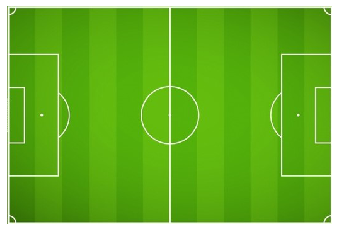

In [3]:
# load field
img1 = mpimg.imread('../../img/field_cropped.jpg')
imgplot = plt.imshow(img1)
ax = plt.gca()
ax.set_axis_off()

### 1. First load dataframe

In [4]:
shots_df = pd.read_pickle('../../data/world_cup_dfs/shots_df.pkl')
shots_df.head()

,outcome,body_part,technique,play_type,shot_location_start,player,statsbomb_xg,team
0,Blocked,Right Foot,Normal,Open Play,"[103.0, 21.0]",Yasir Gharsan Al Shahrani,0.020913,Saudi Arabia
1,Blocked,Right Foot,Normal,Open Play,"[111.0, 52.0]",Aleksandr Samedov,0.039977,Russia
2,Blocked,Left Foot,Normal,Open Play,"[107.0, 26.0]",Yuri Zhirkov,0.035123,Russia
3,Blocked,Right Foot,Normal,Open Play,"[106.0, 49.0]",Alan Dzagoev,0.054171,Russia
4,Goal,Head,Normal,Open Play,"[112.0, 47.0]",Yury Gazinskiy,0.162801,Russia


### 2. Turn the `shot_location_start` coordinates into coordinates that match the field.

In [5]:
from event_helpers import scale_to_visual

In [6]:
# copy dataframe
shots_df_viz = shots_df.copy()
shots_df.head()

# scale to field
shots_df_viz['shot_location_start'] = shots_df_viz['shot_location_start'].apply(lambda x: scale_to_visual(x))

print('original')
display(shots_df.head())
print('scaled')
display(shots_df_viz.head())

original


,outcome,body_part,technique,play_type,shot_location_start,player,statsbomb_xg,team
0,Blocked,Right Foot,Normal,Open Play,"[103.0, 21.0]",Yasir Gharsan Al Shahrani,0.020913,Saudi Arabia
1,Blocked,Right Foot,Normal,Open Play,"[111.0, 52.0]",Aleksandr Samedov,0.039977,Russia
2,Blocked,Left Foot,Normal,Open Play,"[107.0, 26.0]",Yuri Zhirkov,0.035123,Russia
3,Blocked,Right Foot,Normal,Open Play,"[106.0, 49.0]",Alan Dzagoev,0.054171,Russia
4,Goal,Head,Normal,Open Play,"[112.0, 47.0]",Yury Gazinskiy,0.162801,Russia


scaled


,outcome,body_part,technique,play_type,shot_location_start,player,statsbomb_xg,team
0,Blocked,Right Foot,Normal,Open Play,"[438.0, 89.0]",Yasir Gharsan Al Shahrani,0.020913,Saudi Arabia
1,Blocked,Right Foot,Normal,Open Play,"[472.0, 221.0]",Aleksandr Samedov,0.039977,Russia
2,Blocked,Left Foot,Normal,Open Play,"[455.0, 110.0]",Yuri Zhirkov,0.035123,Russia
3,Blocked,Right Foot,Normal,Open Play,"[450.0, 208.0]",Alan Dzagoev,0.054171,Russia
4,Goal,Head,Normal,Open Play,"[476.0, 200.0]",Yury Gazinskiy,0.162801,Russia


### 3. Pick a player or team to visualize

Note: remember to pass in `shots_df_viz` with scaled coordinates

In [7]:
# teams to choose from
shots_df['team'].unique()

array(['Saudi Arabia', 'Russia', 'Nigeria', 'Croatia', 'France',
       'Australia', 'Iceland', 'Argentina', 'Peru', 'Denmark',
       'Switzerland', 'Brazil', 'Mexico', 'Germany', 'Serbia',
       'Costa Rica', 'Belgium', 'Panama', 'England', 'Tunisia', 'Sweden',
       'South Korea', 'Senegal', 'Poland', 'Egypt', 'Japan', 'Colombia',
       'Morocco', 'Portugal', 'Spain', 'Iran', 'Uruguay'], dtype=object)

In [8]:
# players to choose from
shots_df['player'].unique()

array(['Yasir Gharsan Al Shahrani', 'Aleksandr Samedov', 'Yuri Zhirkov',
       'Alan Dzagoev', 'Yury Gazinskiy', 'Mohammad Ibrahim Al Sahlawi',
       'Salem Mohammed Al Dawsari', 'Denis Cheryshev', 'Roman Zobnin',
       'Artem Dzyuba', 'Hattan Babhir', 'Daler Kuzyaev',
       'Aleksandr Golovin', 'Alex Iwobi', 'Ivan Perišić',
       'Andrej Kramarić', 'Odion Jude Ighalo', 'Oghenekaro Etebo',
       'Ante Rebić', 'Mario Mandžukić', 'Šime Vrsaljko', 'Victor Moses',
       'Ivan Rakitić', 'Luka Modrić', 'Dejan Lovren',
       'Kelechi Promise Iheanacho', 'Leon-Aderemi Balogun',
       'Mateo Kovačić', 'Kylian Mbappé Lottin', 'Paul Pogba',
       'Antoine Griezmann', 'Mathew Leckie', 'Lucas Hernández Pi',
       'Aziz Eraltay Behich', 'Mile Jedinak', 'Samuel Yves Umtiti',
       'Benjamin Pavard', 'Nabil Fekir', 'Josh Risdon',
       'Gylfi Þór Sigurðsson', 'Nicolás Hernán Otamendi',
       'Nicolás Alejandro Tagliafico', 'Alfreð Finnbogason',
       'Johann Berg Guðmunds\xadson', 'Birk

In [9]:
from shot_charts import visualize_team_or_player_shots

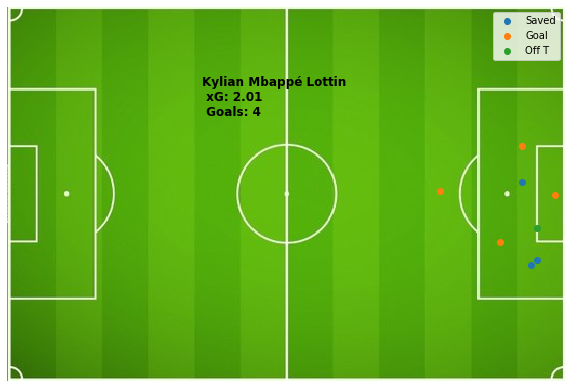

In [10]:
visualize_team_or_player_shots(shots_df_viz, 'Kylian Mbappé Lottin', player=True)

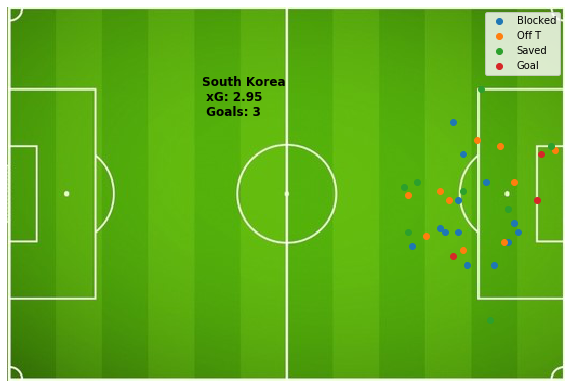

In [11]:
visualize_team_or_player_shots(shots_df_viz,'South Korea', player=False)